FASE 1. EXPLORACIÓN

Realiza una exploración inicial de los datos para identificar posibles problemas, como valores
nulos, atípicos o datos faltantes en las columnas relevantes.
Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la
presencia de valores nulos y estadísticas básicas de las columnas involucradas.
Une los dos conjuntos de datos de la forma más eficiente.

Importar las librerías necesarias

In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer 
from sklearn.experimental import enable_iterative_imputer # Necesario para IterativeImputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import KNNImputer 

pd.set_option('display.max_columns', None)

Abrir y explorar CSV Customer Flight Activity

In [520]:
df_flight = pd.read_csv("Customer Flight Activity.csv", index_col=0)
df_flight.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [521]:
df_flight.info() # No hay valores nulos. Todas son variables numéricas, excepto las fechas (Year, Month).
#Números enteros, excepto por Points accumulated, que incluye decimales.

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


Explorar cada variable

In [522]:
df_flight["Flights Booked"].value_counts().sort_index()

Flights Booked
0     197992
1      12667
2      13641
3      18228
4      12821
5      15084
6      13847
7      14561
8      14357
9      14164
10     13363
11     15705
12     10382
13     10782
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: count, dtype: int64

In [523]:
df_flight["Flights with Companions"].value_counts().sort_index()

Flights with Companions
0     296887
1      17905
2      19272
3      19015
4      13665
5      13424
6       9911
7       7089
8       3965
9       2944
10      1071
11       476
Name: count, dtype: int64

In [524]:
df_flight["Total Flights"].value_counts().sort_index()

Total Flights
0     197992
1       6106
2      13032
3       9783
4      13656
5       9309
6      15273
7       9873
8      14056
9      10688
10     14393
11     12300
12     12409
13     10499
14     10310
15      8544
16      7727
17      6198
18      5757
19      4002
20      3417
21      2610
22      1981
23      1616
24      1209
25       900
26       722
27       504
28       306
29       214
30       150
31        61
32        27
Name: count, dtype: int64

(0.0, 6000.0)

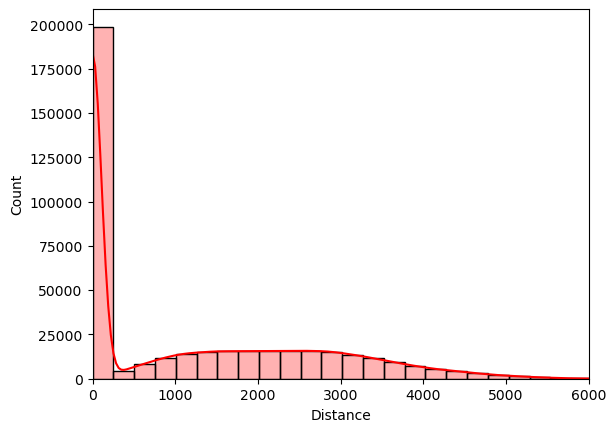

In [525]:
sns.histplot(data=df_flight, x = 'Distance', bins = 25, kde=True, color='red', stat='count', alpha = 0.3) #distribución no es normal, sesgo a la derecha
plt.xlim(0,6000) #hacer coincidir los ejes

(0.0, 700.0)

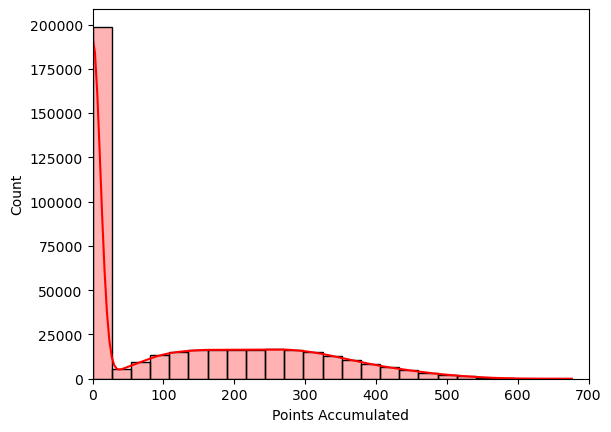

In [526]:
sns.histplot(data=df_flight, x = 'Points Accumulated', bins = 25, kde=True, color='red', stat='count', alpha = 0.3) #distribución no es normal, sesgo a la derecha
plt.xlim(0,700)

(0.0, 800.0)

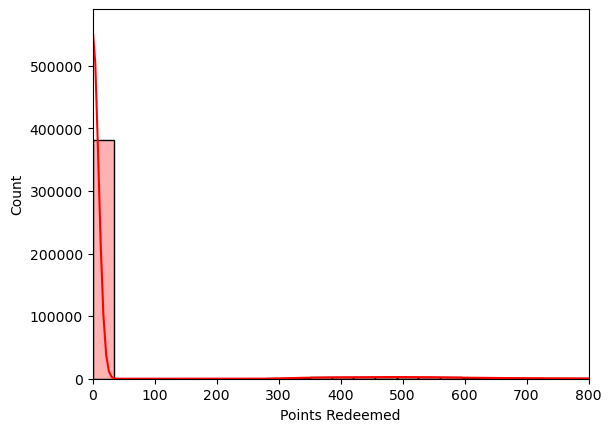

In [527]:
sns.histplot(data=df_flight, x = 'Points Redeemed', bins = 25, kde=True, color='red', stat='count', alpha = 0.3) #distribución no es normal, sesgo a la derecha
plt.xlim(0,800)

(0.0, 80.0)

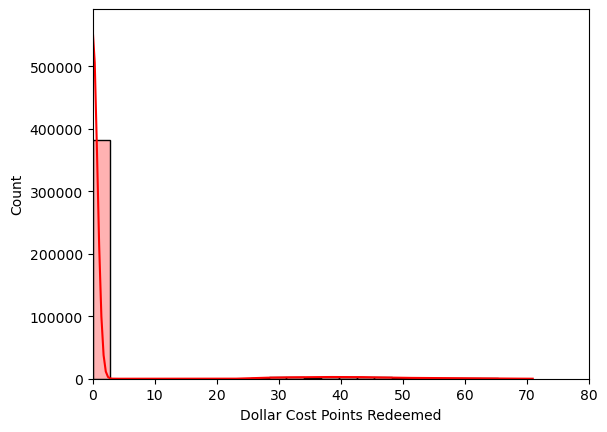

In [528]:
sns.histplot(data=df_flight, x = 'Dollar Cost Points Redeemed', bins = 25, kde=True, color='red', stat='count', alpha = 0.3) #distribución no es normal, sesgo a la derecha
plt.xlim(0,80)

In [529]:
df_flight["Month"] = df_flight["Month"].astype(str) #Cambiar a string porque es categórica
df_flight["Month"].value_counts().sort_index()

Month
1     33802
10    33802
11    33802
12    33802
2     33802
3     33802
4     33802
5     33802
6     33802
7     33802
8     33802
9     33802
Name: count, dtype: int64

In [530]:
df_flight["Year"] = df_flight["Year"].astype(str) #Cambiar a string porque es categórica
df_flight["Year"].value_counts().sort_index()

Year
2017    202812
2018    202812
Name: count, dtype: int64

In [531]:
df_flight.shape # 405624 filas, 9 columnas

(405624, 9)

In [532]:
df_flight.isnull().sum() #comprobar que no hay valores nulos

Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [533]:
df_flight.describe(include='number').T #estadísticas descriptivas de las variables numéricas

,count,mean,std,min,25%,50%,75%,max
Flights Booked,405624.0,4.115052,5.225518,0.0,0.0,1.0,8.0,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.0,0.0,1.0,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.0,1.0,10.0,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.0,488.0,2336.0,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.0,50.0,239.0,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.0,0.0,0.0,71.0


In [534]:
df_flight.describe(include='O').T #estadísticas descriptivas de las variables categóricas

,count,unique,top,freq
Year,405624,2,2017,202812
Month,405624,12,1,33802


In [535]:
df_flight.duplicated().sum() #explorar los duplicados

228705

In [536]:
mascara = df_flight.duplicated(keep=False)
df_flight[mascara].sort_values("Loyalty Number")

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100018,2018,8,0,0,0,0,0.0,0,0
100018,2017,2,2,2,4,1320,132.0,0,0
100018,2018,1,1,0,1,312,31.0,0,0
100018,2018,2,6,0,6,1824,273.0,0,0
...,...,...,...,...,...,...,...,...,...
999986,2017,9,9,0,9,2781,278.0,0,0
999986,2017,10,12,0,12,2856,285.0,0,0
999986,2018,4,0,0,0,0,0.0,0,0


In [537]:
df_flight_copia = df_flight.copy()
df_flight_copia.drop_duplicates(inplace=True) #eliminar duplicados

In [538]:
df_flight_copia.duplicated().sum()

0

In [581]:
df_flight_copia.shape

(176919, 9)

In [582]:
df_flight_copia.to_csv("Customer Flight Activity non duplicates.csv", index=False) 


Abrir y explorar CSV Customer Loyalty History

In [540]:
df_loyalty = pd.read_csv("Customer Loyalty History.csv", index_col=0)
display(df_loyalty.head())

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [541]:
df_loyalty.info() # valores nulos en las columnas cancellation year y cancellation month
# La mayoría de las columnas son categóricas, excepto por salary y CLV (Customer Lifetime Value), 
# enrollment year, enrollment month, cancellation year y cancellation month.

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 2.0

In [542]:
df_loyalty["Enrollment Year"] = df_loyalty["Enrollment Year"].astype(str) #Cambiar a string porque es categórica
df_loyalty["Enrollment Year"].value_counts().sort_index()


Enrollment Year
2012    1686
2013    2397
2014    2370
2015    2331
2016    2456
2017    2487
2018    3010
Name: count, dtype: int64

In [543]:
df_loyalty["Enrollment Month"] = df_loyalty["Enrollment Month"].astype(str) #Cambiar a string porque es categórica
df_loyalty["Enrollment Month"].value_counts().sort_index()

Enrollment Month
1     1192
10    1444
11    1446
12    1480
2     1220
3     1358
4     1388
5     1503
6     1412
7     1473
8     1430
9     1391
Name: count, dtype: int64

In [544]:
df_loyalty["Cancellation Year"].value_counts().sort_index #incluye decimales

<bound method Series.sort_index of Cancellation Year
2018.0    645
2017.0    506
2016.0    427
2015.0    265
2014.0    181
2013.0     43
Name: count, dtype: int64>

In [545]:
#quitar decimales
df_loyalty['Cancellation Year'] = (
    pd.to_numeric(df_loyalty['Cancellation Year'], errors='coerce')
      .round(0)
      .astype('Int64') 
)

In [546]:
df_loyalty["Cancellation Year"] = df_loyalty["Cancellation Year"].astype(str) #Cambiar a string porque es categórica
df_loyalty["Cancellation Year"].value_counts().sort_index()

Cancellation Year
2013       43
2014      181
2015      265
2016      427
2017      506
2018      645
<NA>    14670
Name: count, dtype: int64

In [547]:
percentages_CY = df_loyalty["Cancellation Year"].value_counts(normalize=True).sort_index() * 100

In [548]:
percentages_CY

Cancellation Year
2013     0.256916
2014     1.081436
2015     1.583318
2016     2.551234
2017     3.023242
2018     3.853737
<NA>    87.650117
Name: proportion, dtype: float64

In [549]:
df_loyalty["Cancellation Month"].value_counts().sort_index #inlcuye decimales

<bound method Series.sort_index of Cancellation Month
12.0    213
11.0    212
8.0     208
7.0     186
10.0    180
9.0     176
6.0     165
1.0     155
3.0     149
5.0     148
2.0     139
4.0     136
Name: count, dtype: int64>

In [550]:
#quitar decimales
df_loyalty['Cancellation Month'] = (
    pd.to_numeric(df_loyalty['Cancellation Month'], errors='coerce')
      .round(0)
      .astype('Int64') 
)

In [551]:
df_loyalty["Cancellation Month"] = df_loyalty["Cancellation Month"].astype(str) #Cambiar a string porque es categórica
df_loyalty["Cancellation Month"].value_counts().sort_index()

Cancellation Month
1         155
10        180
11        212
12        213
2         139
3         149
4         136
5         148
6         165
7         186
8         208
9         176
<NA>    14670
Name: count, dtype: int64

In [552]:
percentages_CM = df_loyalty["Cancellation Month"].value_counts(normalize=True).sort_index() * 100

In [553]:
percentages_CM

Cancellation Month
1        0.926092
10       1.075462
11       1.266655
12       1.272630
2        0.830495
3        0.890243
4        0.812571
5        0.884268
6        0.985840
7        1.111310
8        1.242756
9        1.051562
<NA>    87.650117
Name: proportion, dtype: float64

Ambas columnas de Cancellation Month y Year son prácticamente nulas por lo que se van a eliminar.

In [554]:
df_loyalty = df_loyalty.drop(["Cancellation Year", "Cancellation Month"], axis=1)

In [555]:
df_loyalty.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
Loyalty Number,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10


In [556]:
df_loyalty.shape # 16737 filas, 13 columnas

(16737, 13)

In [557]:
df_loyalty.isnull().sum() / len(df_loyalty) * 100 #25 % de valores nulos en la variable salario

Country              0.000000
Province             0.000000
City                 0.000000
Postal Code          0.000000
Gender               0.000000
Education            0.000000
Salary              25.321145
Marital Status       0.000000
Loyalty Card         0.000000
CLV                  0.000000
Enrollment Type      0.000000
Enrollment Year      0.000000
Enrollment Month     0.000000
dtype: float64

In [558]:
df_loyalty.describe(include="number").T #estadísticas descriptivas de las variables numéricas

,count,mean,std,min,25%,50%,75%,max
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38


In [559]:
df_loyalty.describe(include="O").T #estadísticas descriptivas de las variables categóricas

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766
Enrollment Year,16737,7,2018,3010


Explorar las categorías por columna

In [560]:
df_loyalty["Country"].value_counts()

Country
Canada    16737
Name: count, dtype: int64

In [561]:
df_loyalty["Province"].value_counts()

Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64

In [562]:
df_loyalty["City"].value_counts()

City
Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton           486
Quebec City        485
Dawson Creek       444
Fredericton        425
Regina             409
Kingston           401
Tremblant          398
Victoria           389
Hull               358
West Vancouver     324
St. John's         258
Thunder Bay        256
Sudbury            227
Moncton            211
Calgary            191
Banff              179
London             174
Peace River        113
Whitehorse         110
Kelowna             88
Charlottetown       66
Name: count, dtype: int64

In [563]:
df_loyalty["Postal Code"].value_counts()

Postal Code
V6E 3D9    911
V5R 1W3    684
V6T 1Y8    582
V6E 3Z3    544
M2M 7K8    534
P1J 8T7    500
H2T 9K8    499
K8V 4B2    486
G1B 3L5    485
H2T 2J6    446
U5I 4F1    444
V1E 4R6    443
E3B 2H2    425
R2C 0M5    415
M9K 2P4    401
H5Y 2S9    398
V10 6T5    389
K1F 2R2    389
H2Y 2W2    365
J8Y 3Z5    358
M8Y 4K8    340
H4G 3T4    338
B3J 9S2    329
V6V 8Z3    324
P2T 6G3    322
H2Y 4R4    315
M1R 4K3    313
P1L 8X8    282
P1W 1K4    275
T9G 1W3    266
A1C 6H9    258
M2Z 4K1    257
K8T 5M5    256
P5S 6R4    246
M5V 1G5    227
S6J 3G0    226
T3G 6Y6    220
E1A 2A7    211
T3E 2V9    191
B3C 2M8    189
S1J 3C5    183
T4V 1D4    179
M5B 3E4    174
M2M 6J7    153
R6Y 4T5    143
M2P 4F6    126
K1G 4Z0    120
T9O 2W2    113
Y2K 6R0    110
R3R 3T4    100
H3T 8L4     89
V09 2E9     88
C1A 6E8     66
H3J 5I6      7
M3R 4K8      3
Name: count, dtype: int64

In [564]:
df_loyalty["Gender"].value_counts()

Gender
Female    8410
Male      8327
Name: count, dtype: int64

In [565]:
df_loyalty["Education"].value_counts()

Education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64

In [566]:
df_loyalty["Marital Status"].value_counts()

Marital Status
Married     9735
Single      4484
Divorced    2518
Name: count, dtype: int64

In [567]:
df_loyalty["Loyalty Card"].value_counts()

Loyalty Card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64

In [568]:
df_loyalty["Enrollment Type"].value_counts()

Enrollment Type
Standard          15766
2018 Promotion      971
Name: count, dtype: int64

In [569]:
df_loyalty.duplicated().sum() #No hay duplicados

0

<Axes: xlabel='Salary', ylabel='Count'>

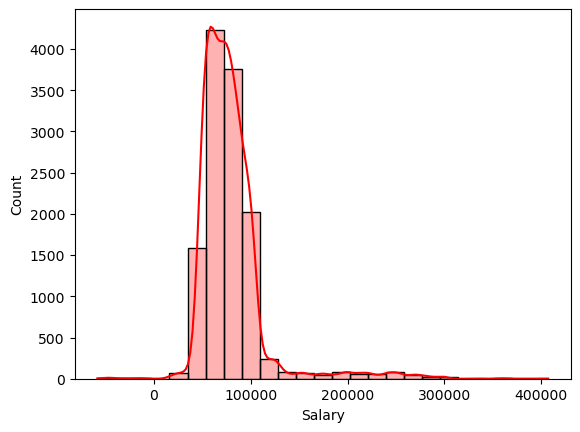

In [570]:
sns.histplot(data=df_loyalty, x = 'Salary', bins = 25, kde=True, color='red', stat='count', alpha = 0.3) #distribución no es normal, sesgo a la derecha

Colocar los valores negativos de la variable Salary como nulos

In [571]:
df_loyalty["Salary"] = df_loyalty["Salary"].mask(df_loyalty["Salary"] < 0)

(0.0, 420000.0)

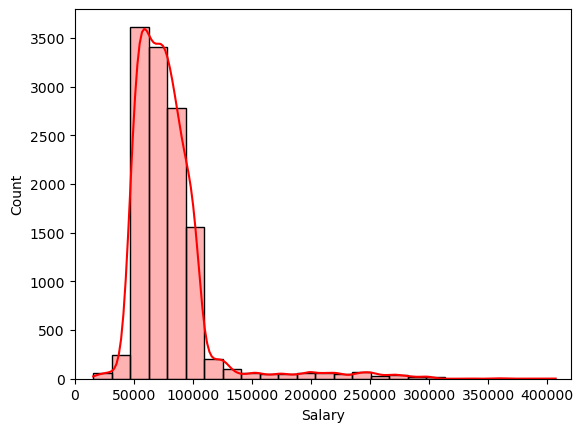

In [572]:
sns.histplot(data=df_loyalty, x = 'Salary', bins = 25, kde=True, color='red', stat='count', alpha = 0.3) #distribución no es normal, sesgo a la derecha
plt.xlim(0,420000)

In [573]:
df_loyalty.isnull().sum() / len(df_loyalty) * 100 #comprobar que aumentó el porcentaje de valores nulos de la variable Salary

Country              0.00000
Province             0.00000
City                 0.00000
Postal Code          0.00000
Gender               0.00000
Education            0.00000
Salary              25.44064
Marital Status       0.00000
Loyalty Card         0.00000
CLV                  0.00000
Enrollment Type      0.00000
Enrollment Year      0.00000
Enrollment Month     0.00000
dtype: float64

Inputar los valores nulos

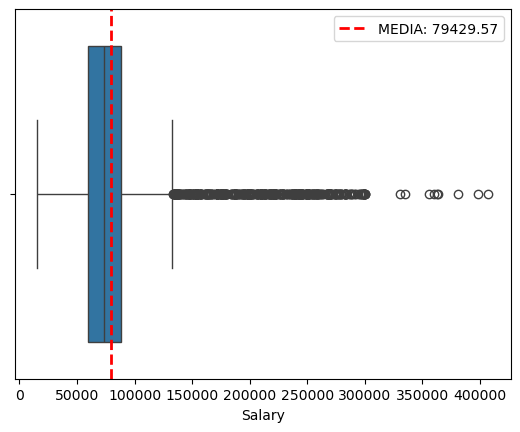

In [574]:
sns.boxplot(data=df_loyalty, x = 'Salary')
mean_salary = round(df_loyalty['Salary'].mean(),2)
plt.axvline(x = mean_salary, color = 'red', linestyle='--', linewidth = 2, label = f"MEDIA: {mean_salary}")
plt.legend(); #muchos valores atípicos

In [575]:
median_salary = round(df_loyalty['Salary'].median(),2)
median_salary

73510.0

In [576]:
df_loyalty_copia = df_loyalty.copy()
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_loyalty_copia[["Salary"]])
df_loyalty_copia[["Salary_imputer"]] = imputer_iterative_imputado

imputer_knn = KNNImputer(n_neighbors = 5)
imputer_knn_imputado = imputer_knn.fit_transform(df_loyalty_copia[["Salary"]])
df_loyalty_copia[["Salary_knn"]] = imputer_knn_imputado

In [577]:
df_loyalty_copia.describe()[["Salary","Salary_imputer", "Salary_knn"]]

,Salary,Salary_imputer,Salary_knn
count,12479.000000,16737.000000,16737.000000
mean,79429.572642,79429.572642,79429.572642
std,34727.560404,29986.165418,29986.165418
min,15609.000000,15609.000000,15609.000000
25%,59265.000000,63991.000000,63991.000000
50%,73510.000000,79429.572642,79429.572642
75%,88600.500000,82940.000000,82940.000000
max,407228.000000,407228.000000,407228.000000


In [578]:
df_loyalty_copia.drop(["Salary",
              "Salary_knn"
             ], axis = 1, inplace = True)

nuevo_nombre = {"Salary_imputer": "Salary"} 
df_loyalty_copia.rename(columns = nuevo_nombre, inplace = True) 

In [579]:
df_loyalty_copia.isnull().sum()

Country             0
Province            0
City                0
Postal Code         0
Gender              0
Education           0
Marital Status      0
Loyalty Card        0
CLV                 0
Enrollment Type     0
Enrollment Year     0
Enrollment Month    0
Salary              0
dtype: int64

In [580]:
df_loyalty_copia.to_csv("Customer Loyalty History non nulls.csv", index=False) 